# SWMAL Exercise

## Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for SWMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [8]:
import os
datapath = os.path.join("../DataSets/lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")
print(datapath)

 Volume in drive C is Windows
 Volume Serial Number is AE44-94C6

 Directory of c:\Users\45201\OneDrive\Uni\6_Semester\ML\MLKursus\Martin

30-01-2024  13:29    <DIR>          .
30-01-2024  13:32    <DIR>          ..
30-01-2024  13:51            43.410 intro.ipynb
30-01-2024  12:38                10 README.txt
30-01-2024  12:38                 0 temp.py
               3 File(s)         43.420 bytes
               2 Dir(s)  234.430.619.648 bytes free

OK
../DataSets/lifesat\


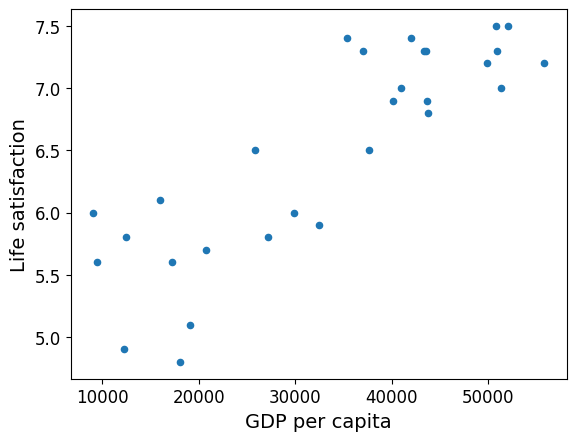

[[5.96242338]]
OK


In [9]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

## SWMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

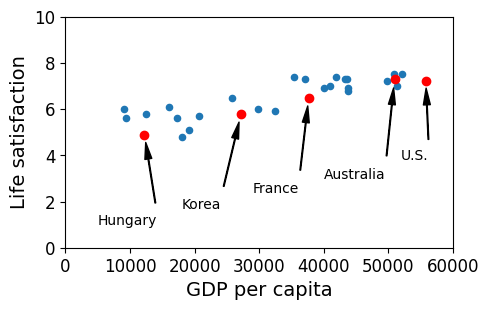

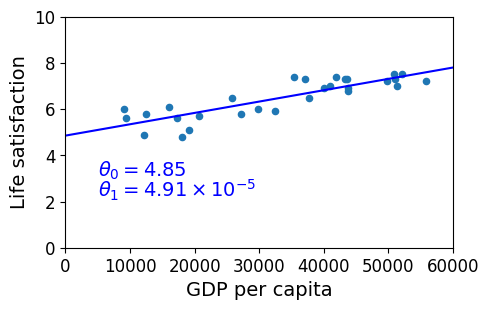

OK


In [10]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/supervised_learning.png" alt="WARNING: could not get image from server." style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \textrm{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \textrm{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness? 

NOTE$_1$: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

NOTE$_2$: there are different definitions of the $R^2$, 'coefficient of determination', in linear algebra. We stricly use the formulation above. 

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

In [11]:
# TODO: add your code here..
assert False, "TODO: solve Qa, and remove me.."

AssertionError: TODO: solve Qa, and remove me..

## The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (as in [HOML:p.26]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbors (KNN) estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the KNN model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

Remember to put pointer/text from the Sckikit-learn documentation in the journal...(did you find the right KNN model etc.)

In [ ]:
# this is our raw data set:
sample_data

In [ ]:
# and this is our preprocessed data
country_stats

In [ ]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# TODO: add your code here..
assert False, "TODO: add you instatiation and training of the knn model here.."
# knn = ..

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

In [ ]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
assert False, "TODO: try knn with different k_neighbor params, that is re-instantiate knn, refit and replot.."

### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
assert False, "TODO: predict value for Cyprus and fetch the score() from the fitting."

###  [OPTIONAL] Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

In [ ]:
# TODO: add your code here..
assert False, "TODO: try prescale data for the MPL...any better?"

REVISIONS||
:- | :-
2018-12-18| CEF, initial.                  
2019-01-24| CEF, spell checked and update. 
2019-01-30| CEF, removed reset -f, did not work on all PC's. 
2019-08-20| CEF, E19 ITMAL update. 
2019-08-26| CEF, minor mod to NN exercise.
2019-08-28| CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-09-24| CEF, updated text to R2, Qa exe.
2020-09-28| CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-01-12| CEF, updated Qe.
2021-02-08| CEF, added ls for Mac/Linux to dir command cell. 
2021-08-02| CEF, update to E21 ITMAL.
2021-08-03| CEF, fixed ref to p21 => p.22.
2022-01-25| CEF, update to F22 SWMAL.
2022-08-30| CEF, update to v1 changes.
2023-08-30| CEF, minor table update for.
2023-09-01| CEF, fixed ref to p.22 => p.28, changed LaTeX mbox and newcommand (VSCode error) to textrm/mathrm and renewcommand.
